<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/BT_ANN_HOA_MONAN_KHUONMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


link google drive **nhận dạng 4 loại hoa**: https://drive.google.com/drive/folders/1Y0DSrF8QBMKF6QMHap6aAiNwJ90hb6_3?usp=sharing

In [56]:
from keras import datasets, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image

import numpy as np
import os

hoa = ['hoacuc','hoamattroi','hoathuocduoc','hoavantho']
dir_train = '/content/drive/MyDrive/Hoa' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in hoa:
    path = os.path.join(dir,i)
    index_label = hoa.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      # img = img.reshape(150,150) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
x_train = x_train.reshape(84,150*150*3)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)

(84, 67500)
(84, 4)


In [57]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(256, activation='relu', name='layer2'))
model.add(Dense(128, activation='relu', name='layer3'))
model.add(Dense(4, activation='softmax', name='layer4'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 4)                 516       
                                                                 
Total params: 34,725,252
Trainable params: 34,725,252
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 20)
model.save('hoa.h5')

Epoch 1/20
3/3 [==============================] - 1s 110ms/step - loss: 21.7256 - accuracy: 0.2381
Epoch 2/20
3/3 [==============================] - 0s 109ms/step - loss: 44.1664 - accuracy: 0.2738
Epoch 3/20
3/3 [==============================] - 0s 108ms/step - loss: 10.7583 - accuracy: 0.3690
Epoch 4/20
3/3 [==============================] - 0s 114ms/step - loss: 7.5144 - accuracy: 0.4167
Epoch 5/20
3/3 [==============================] - 0s 109ms/step - loss: 8.1689 - accuracy: 0.3214
Epoch 6/20
3/3 [==============================] - 0s 114ms/step - loss: 3.6443 - accuracy: 0.5476
Epoch 7/20
3/3 [==============================] - 0s 109ms/step - loss: 4.7184 - accuracy: 0.6190
Epoch 8/20
3/3 [==============================] - 0s 113ms/step - loss: 3.4508 - accuracy: 0.6310
Epoch 9/20
3/3 [==============================] - 0s 115ms/step - loss: 1.2509 - accuracy: 0.7262
Epoch 10/20
3/3 [==============================] - 0s 111ms/step - loss: 0.8793 - accuracy: 0.8214
Epoch 11/20
3/3 

In [64]:
score_train = model.evaluate(x_train, y_train)
print('do chinh xac',score_train)

3/3 [==============================] - 0s 37ms/step - loss: 0.1154 - accuracy: 0.9524
do chinh xac [0.11540192365646362, 0.9523809552192688]


1/1 [==============================] - 0s 25ms/step
hoamattroi


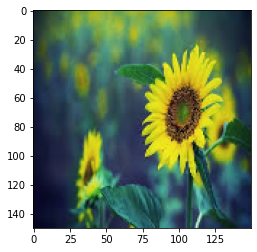

In [51]:
pic = load_img('/content/drive/MyDrive/Hoa/hoamattroi/10.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

1/1 [==============================] - 0s 26ms/step
hoacuc


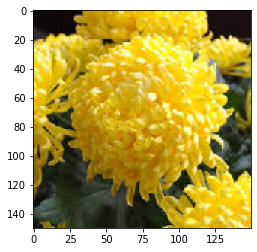

In [52]:
pic = load_img('/content/drive/MyDrive/Hoa/hoacuc/12.jpg', target_size=(150,150)) 
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

1/1 [==============================] - 0s 68ms/step
hoathuocduoc


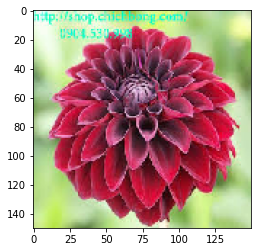

In [53]:
pic = load_img('/content/drive/MyDrive/Hoa/hoathuocduoc/15.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

1/1 [==============================] - 0s 25ms/step
hoavantho


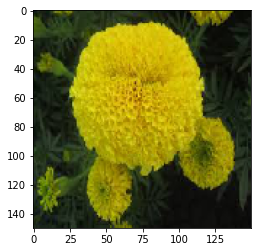

In [54]:
pic = load_img('/content/drive/MyDrive/Hoa/hoavantho/13.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model.predict(pic), axis=1))
print(hoa[a])

Link drive **nhận dạng 3 người:**https://drive.google.com/drive/folders/1M24uPWi3cvNaBdl0DCIkGRDsCh-Op1h6?usp=sharing

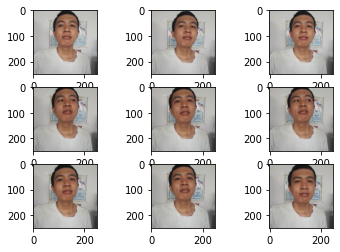

In [128]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/NhanDangKhuonMat/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanAnhTuan'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [130]:
from os import listdir
from numpy import asarray
from numpy import save


photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanAnhTuan'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanPhuocTho'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanTienDat'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
photos = photos.reshape(58,150*150*3)
labels = asarray(labels)
labels = np_utils.to_categorical(labels)
print(photos.shape,labels.shape)


(58, 67500) (58, 3)


In [132]:
model2 = Sequential()
model2.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model2.add(Dense(256, activation='relu', name='layer2'))
model2.add(Dense(128, activation='relu', name='layer3'))
model2.add(Dense(3, activation='softmax', name='layer4'))
model2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 3)                 387       
                                                                 
Total params: 34,725,123
Trainable params: 34,725,123
Non-trainable params: 0
_________________________________________________________________


In [133]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 20)
model2.save('khuonmat.h5')

Epoch 1/20
2/2 [==============================] - 0s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 122ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 118ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 131ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 118ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
2/2 [==============================] - 0s 117ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 0s 119ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 0s 122ms/step - loss: 0.0000e+0

In [135]:
score = model.evaluate(x_train, y_train)
print('do chinh xac',score)

2/2 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 1.0000
do chinh xac [0.0, 1.0]


1/1 [==============================] - 0s 29ms/step
BanAnhTuan


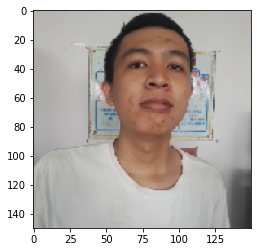

In [142]:
pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanAnhTuan2.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model2.predict(pic), axis=1))
ten = ['BanAnhTuan','BanTienDat','BanPhuocTho']
print(ten[a])

1/1 [==============================] - 0s 27ms/step
BanTienDat


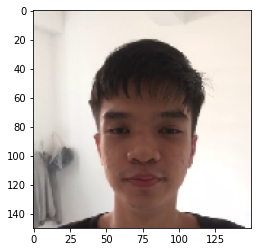

In [143]:
pic = load_img('/content/drive/MyDrive/NhanDangKhuonMat/BanTienDat18.bmp', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500) 
a = int(np.argmax(model2.predict(pic), axis=1))
ten = ['BanAnhTuan','BanTienDat','BanPhuocTho']
print(ten[a])

link drive **4 món ăn**: https://drive.google.com/drive/folders/1W6mVUscQ-cPkowOJtwYTHFWY9I_WuflG?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
from keras import datasets, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image

import numpy as np
import os

mon = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
dir_train = '/content/drive/MyDrive/monan' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in mon:
    path = os.path.join(dir,i)
    index_label = mon.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      # img = img.reshape(150,150) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) #tạo dữ liệu 
# xử lí dữ liệu
x_train = np.array(x_train)
x_train = x_train.reshape(100,150*150*3)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape)
print(y_train.shape)

(100, 67500)
(100, 5)


In [50]:
model3 = Sequential()
model3.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model3.add(Dense(256, activation='relu', name='layer2'))
model3.add(Dense(128, activation='relu', name='layer3'))
model3.add(Dense(5, activation='softmax', name='layer4'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 5)                 645       
                                                                 
Total params: 34,725,381
Trainable params: 34,725,381
Non-trainable params: 0
_________________________________________________________________


In [52]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model3.fit(x_train,y_train,epochs = 50)
model3.save('monan.h5')

Epoch 1/50
4/4 [==============================] - 1s 13ms/step - loss: 18.7361 - accuracy: 0.4900
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 10.7599 - accuracy: 0.3700
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 12.0495 - accuracy: 0.4800
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 5.3322 - accuracy: 0.6300
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 2.2236 - accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.9097 - accuracy: 0.7400
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.6221 - accuracy: 0.8300
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 1.3350 - accuracy: 0.8000
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6564 - accuracy: 0.7900
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2522 - accuracy: 0.9000
Epoch 11/50
4/4 [=========

In [53]:
score = model3.evaluate(x_train, y_train)
print('do chinh xac',score)

4/4 [==============================] - 0s 6ms/step - loss: 9.6492e-04 - accuracy: 1.0000
do chinh xac [0.0009649160783737898, 1.0]


1/1 [==============================] - 0s 15ms/step
banhbao


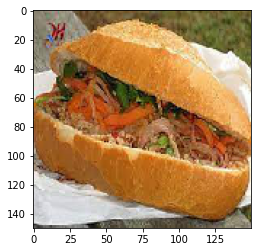

In [54]:
pic = load_img('/content/drive/MyDrive/monan/banhmi/20.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])
# nhận dạng sai do ít dữ liệu train

1/1 [==============================] - 0s 72ms/step
banhbao


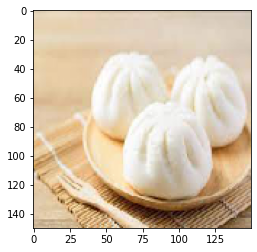

In [55]:
pic = load_img('/content/banhbao.jpg', target_size=(150,150)) 
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])

1/1 [==============================] - 0s 50ms/step
bunrieu


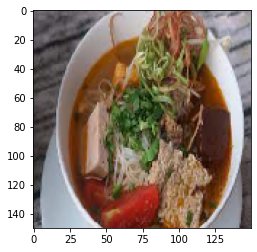

In [65]:
pic = load_img('/content/drive/MyDrive/monan/bunrieu/2.jpg', target_size=(150,150))
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])

1/1 [==============================] - 0s 16ms/step
banhmi


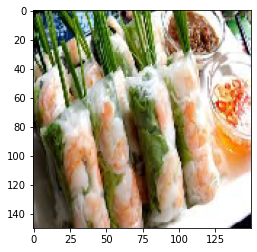

In [99]:
pic = load_img('/content/drive/MyDrive/monan/banhcuon/15.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])
# nhận dạng sai do ít dữ liệu train